In [33]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm

In [34]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yosim/Desktop/2024-2/AI_2024-2/09-10/1week-HW/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [35]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [36]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [37]:
unique_values = df['Sex'].unique()
unique_values

array(['M', 'F', 'I'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [39]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [40]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [41]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [42]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [43]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

In [106]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [107]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [108]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3339, 3, 8) (3339,)
(834, 3, 8) (834,)


In [109]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)

(3339, 28)
(834, 28)


위 코드에서 2개의 y값이 같아야하는데위 코드에서 2개의 y값이 같아야하는데 random_state에 따라 class 크기가 다르게 입력되는 문제가 발생한다.
따라서 random_state가 동일한 숫자를 찾아주어야 한다.

In [110]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 8 28


In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [112]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 28)                3612      
                                                                 
Total params: 90268 (352.61 KB)
Trainable params: 90268 (352.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
94/94 [==============================] - 5s 17ms/step - loss: 2.6534 - accuracy: 0.1691 - val_loss: 2.4772 - val_accuracy: 0.1317
Epoch 2/20
94/94 [==============================] - 1s 8ms/step - loss: 2.4296 - accuracy: 0.1864 - val_loss: 2.3831 - val_accuracy: 0.2066
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 2.3246 - accuracy: 0.2053 - val_loss: 2.3101 - val_accuracy: 0.2066
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 2.2508 - accuracy: 0.2176 - val_loss: 2.3347 - val_accuracy: 0.1617
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 2.2259 - accuracy: 0.2067 - val_loss: 2.2170 - val_accuracy: 0.2515
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 2.1851 - accuracy: 0.2293 - val_loss: 2.2426 - val_accuracy: 0.2036
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 2.1737 - accuracy: 0.2419 - val_loss: 2.1711 - val_accuracy: 0.2545
Epoch 8/20
94/94 [=

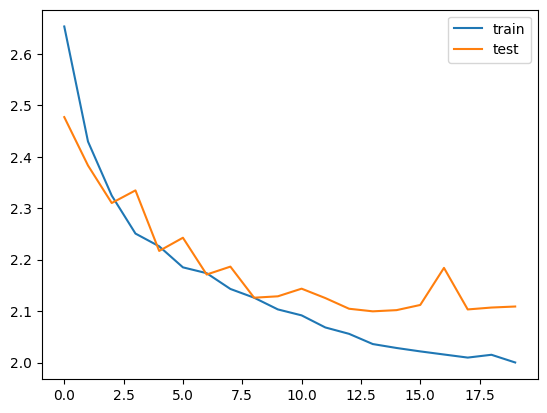

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [116]:
model.evaluate(X_train_seq, y_train_seq)

105/105 [==============================] - 0s 4ms/step - loss: 2.0030 - accuracy: 0.2645


[2.0029921531677246, 0.26445043087005615]

In [117]:
model.evaluate(X_test_seq, y_test_seq)

27/27 [==============================] - 0s 4ms/step - loss: 2.0660 - accuracy: 0.2242


[2.065978527069092, 0.2242206186056137]

27/27 [==============================] - 1s 4ms/step
Confusion Matrix


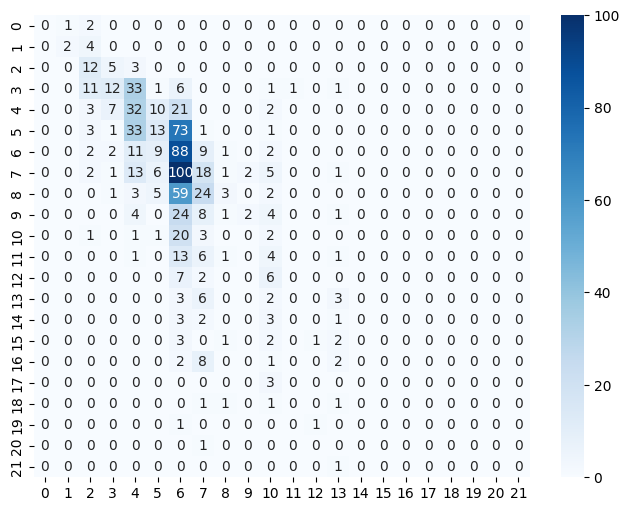

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [119]:
base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file='abalone_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

27/27 [==============================] - 0s 4ms/step - loss: 2.0660 - accuracy: 0.2242
model saved at  abalone_Model.h5
Accuracy >22.422062
Base Loss >2.07


C:\Users\yosim\AppData\Local\Temp\ipykernel_25432\3580431946.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_file, include_optimizer=False)


# 모델 로드

In [120]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [121]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [122]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [126]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(28, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 28)                7196      
                                                                 
Total params: 126876 (495.61 KB)
Trainable params: 40220 (157.11 KB)
Non-trainable params: 86656 (338.50 KB)
_________________________________________________________________


In [127]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_1,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_2,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense_6,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_7,True


In [129]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
94/94 [==============================] - 1s 5ms/step - loss: 1.9666 - accuracy: 0.2692 - val_loss: 2.1342 - val_accuracy: 0.2455
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 1.9679 - accuracy: 0.2749 - val_loss: 2.1204 - val_accuracy: 0.2275
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 1.9648 - accuracy: 0.2749 - val_loss: 2.1153 - val_accuracy: 0.2335
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 1.9569 - accuracy: 0.2802 - val_loss: 2.1232 - val_accuracy: 0.2216
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 1.9628 - accuracy: 0.2789 - val_loss: 2.1350 - val_accuracy: 0.2275
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 1.9615 - accuracy: 0.2699 - val_loss: 2.1371 - val_accuracy: 0.2305
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 1.9590 - accuracy: 0.2666 - val_loss: 2.1349 - val_accuracy: 0.2246
Epoch 8/20
94/94 [==

### find tunning

In [130]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [131]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_1,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_2,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_6,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_7,True


In [133]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
94/94 [==============================] - 5s 17ms/step - loss: 1.9886 - accuracy: 0.2772 - val_loss: 2.1585 - val_accuracy: 0.2365
Epoch 2/20
94/94 [==============================] - 1s 7ms/step - loss: 1.9577 - accuracy: 0.2755 - val_loss: 2.1645 - val_accuracy: 0.2096
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 1.9519 - accuracy: 0.2735 - val_loss: 2.2017 - val_accuracy: 0.2395
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 1.9590 - accuracy: 0.2802 - val_loss: 2.1795 - val_accuracy: 0.2335
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 1.9470 - accuracy: 0.2902 - val_loss: 2.2020 - val_accuracy: 0.2305
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 1.9498 - accuracy: 0.2915 - val_loss: 2.1996 - val_accuracy: 0.2275
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 1.9485 - accuracy: 0.2839 - val_loss: 2.2104 - val_accuracy: 0.2275
Epoch 8/20
94/94 [=

In [135]:
new_model.evaluate(X_test_seq, y_test_seq)

27/27 [==============================] - 0s 3ms/step - loss: 2.1572 - accuracy: 0.2422


[2.157210350036621, 0.24220623075962067]